In [18]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt

# read dataframe
df_change = pd.read_csv('dataset/temperature_change/temperature.csv',index_col="Year")
df_change.index=pd.to_datetime(df_change.index.astype(str),format='%Y')
#for i in range(0,df_change.shape[0]):
#    index.append(datetime.strptime(str(df_change.at[0,'Year']),"%Y")) 

In [19]:
import math

In [20]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [21]:
df_change.head()

,Temperature_Change
Year,
1961-01-01,0.212
1962-01-01,0.035
1963-01-01,0.165
1964-01-01,-0.255
1965-01-01,-0.228


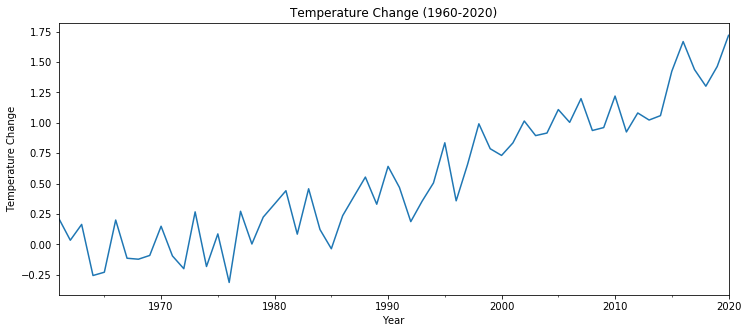

In [22]:
#plot average 
plt.title("Temperature Change (1960-2020)")
plt.xlabel("Year")
plt.ylabel("Temperature Change")
df_change['Temperature_Change'].plot(figsize=(12,5))

In [23]:
#check stationary
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):    
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df_change['Temperature_Change'])

1. ADF :  1.3750275271324781
2. P-Value :  0.9969976899188413
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression: 52
5. Critical Values :
	 1% :  -3.562878534649522
	 5% :  -2.918973284023669
	 10% :  -2.597393446745562


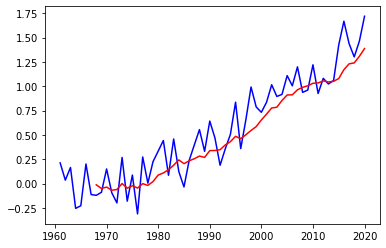

In [24]:
#smooth
#Moving Average
moving_avg = df_change.rolling(8).mean()
plt.plot(df_change ,color = 'blue')
plt.plot(moving_avg, color='red')
plt.show()

In [25]:
ts_log_diff = df_change - df_change.shift()
ts_log_diff.dropna(inplace=True)
ad_test(ts_log_diff['Temperature_Change'])

1. ADF :  -7.936522299467417
2. P-Value :  3.4019736346568897e-12
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 56
5. Critical Values :
	 1% :  -3.552928203580539
	 5% :  -2.9147306250000002
	 10% :  -2.595137155612245


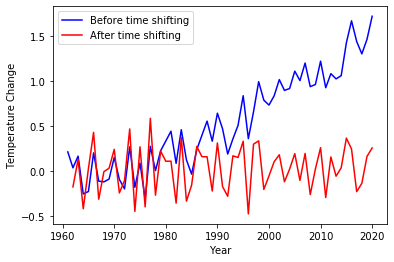

In [26]:
#smooth
#Moving Average
moving_avg = df_change.rolling(8).mean()
plt.xlabel("Year")
plt.ylabel("Temperature Change")
plt.plot(df_change ,color = 'blue',label="Before time shifting")
plt.plot(ts_log_diff, color='red',label="After time shifting")
plt.legend(loc="upper left")
plt.show()

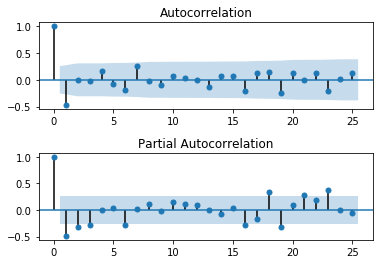

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def draw_acf_pacf(ts,lags):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts,ax=ax1,lags=lags)
    ax2 = f.add_subplot(212)
    plot_pacf(ts,ax=ax2,lags=lags)
    plt.subplots_adjust(hspace=0.5)
    plt.show()
draw_acf_pacf(ts_log_diff,25)

C:\Users\viki\anaconda3\envs\cusplondon\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\viki\anaconda3\envs\cusplondon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provide

Text(0.5, 1.0, 'RMSE: 0.2255')

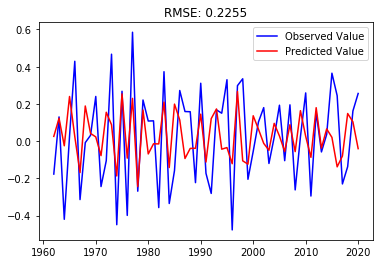

In [28]:
#build model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_change, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff,color = 'blue',label="Observed Value")
plt.plot(results_AR.fittedvalues, color='red',label="Predicted Value")
plt.legend(loc="upper right")
plt.title('RMSE: %.4f'% math.sqrt(sum((results_AR.fittedvalues.values-ts_log_diff["Temperature_Change"].values)**2)/len(ts_log_diff)))

In [29]:
xlist=[]
for j in range(0,60):
    xlist.append(df_change["Temperature_Change"][0])

Year
1962-01-01    0.025387
1963-01-01    0.122831
1964-01-01   -0.024982
1965-01-01    0.239830
1966-01-01    0.024610
dtype: float64


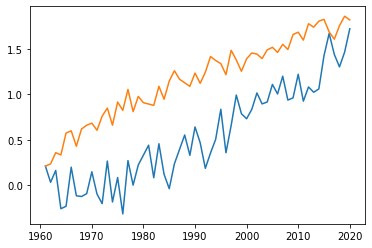

In [30]:

predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

predictions_ARIMA_log = pd.Series(xlist, index=df_change.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
plt.figure()
plt.plot(df_change)
plt.plot(predictions_ARIMA_log)

In [31]:
x_array=results_AR.forecast(10)[0]

In [35]:
x_array[9]

1.897970448563019

In [32]:
#2030
x_array[9]-1.301

0.5969704485630192

In [33]:
#2040
x_array1=results_AR.forecast(20)[0]
x_array1[19]-1.301

0.8507891603825068

In [36]:
x_array1[19]

2.151789160382507

In [34]:
x_array1

array([1.63335243, 1.71219963, 1.71184671, 1.74962667, 1.7690466 ,
       1.79730643, 1.82131006, 1.84736295, 1.87242917, 1.89797045,
       1.923283  , 1.94870567, 1.97407533, 1.99947051, 2.0248534 ,
       2.05024221, 2.07562817, 2.1010155 , 2.12640217, 2.15178916])